# **Importing Python Libraries**

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [114]:
df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Information of Data**
Describe function in pandas helps to explain Number of Non Nun values, Mean of Values, Minimum number of value, Standard Deviation, Quartiles (25th, 50th, and 75th percentiles), Maximum number of value.

In [115]:
description = df.describe()
description.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000


**Seperating Features(X) and Label(Y)**
For training and testing data of a dataset we need to seperate Features and Labels(Target). X represents features and Y represents Label.

In [116]:
X = df.iloc[:, :-1]
Y = df["price_range"]

# **Correlation Matrix**
Correlation Matrix helps to measure how strong and in which direction two variables are linked in a straight line.

Text(0.5, 1.0, 'Correlation Matrix')

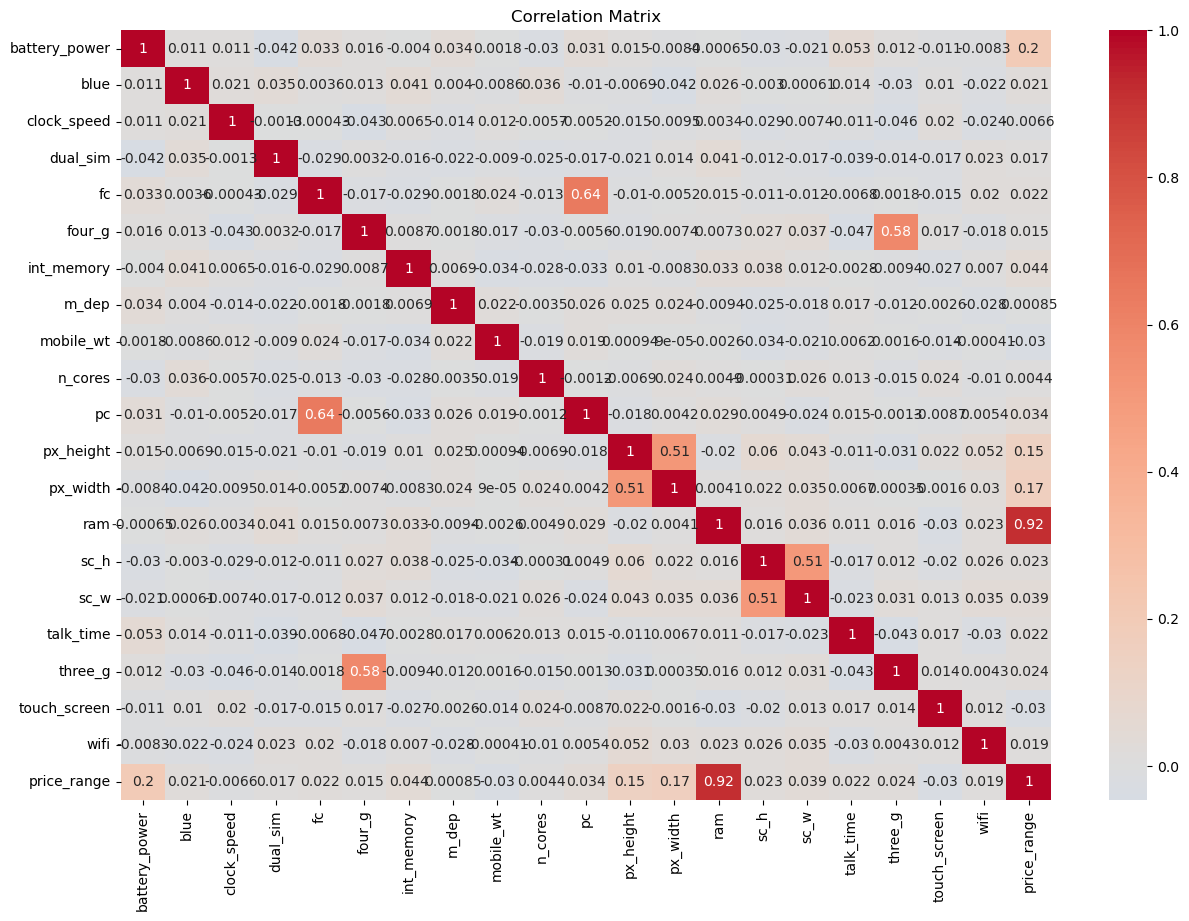

In [117]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))  # Set the figure size

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')  # Set the title
#plt.show()

# **Test_train_Split using model_selection Sklearn**
Splitting Test and Train data, we split to train a model on one subset (training set) and then evaluate its performance on another subset (testing set) that the model has not seen during training. 

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(1600, 20)

# **Using RandomForest**
Using Random Forest as it is one of the State of the art Model. It combines multiple individual decision trees to create a more robust and accurate predictive model. Algorithm improves upon the limitations of a single decision tree by reducing overfitting and increasing generalization performance

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

**Training**

In [120]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

**Testing**
Testing on Unseen data

In [121]:
a=clf.predict(X_test)

**Storing Y_test in a list for making Classification report**

In [122]:
y_test = list(Y_test)
y_test[0]

0

# **Making Classification Report**
It evaluates the performance of a classification model for each class in a dataset.The classification report typically includes metrics such as precision, recall, F1-score, and support for each class. These metrics help you understand how well the model is performing for different classes, rather than just looking at an overall accuracy score.

As we see our model performance is much precise in class 0 and 3 while not much good in class 2 and 3.

In [123]:
from sklearn.metrics import classification_report
print(classification_report(a, y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       124
           1       0.60      0.74      0.67        74
           2       0.61      0.75      0.67        75
           3       0.96      0.84      0.90       127

    accuracy                           0.80       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.83      0.80      0.81       400



# **Confusion Matrix**
Working of Confusion Matrix is similar to Classification report we call alse say it is visual of Classification report. It helps you understand how well the model is classifying instances from different classes and provides insight into the types of errors it's making. 
As we can see at Class 0 and 3 model perform much precisely but not good at class 1 and 2.

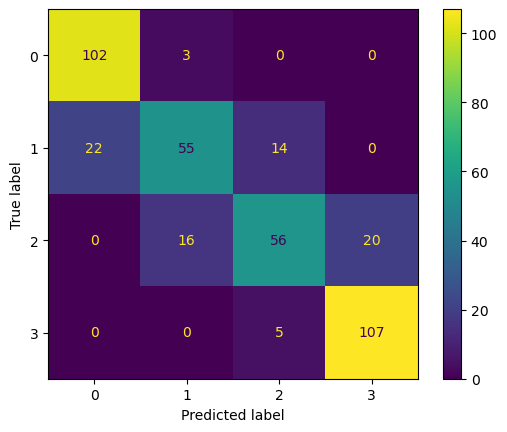

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, a, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

# **Feature Importance**
Feature imporatnce tells which features contributes or contains more information to model's decision making process. It is useful for gaining insights, Identifying important features and Model Interpretability.

In [125]:
first_row_data = X.columns.tolist()
#first_row_data

In [126]:
features=clf.feature_importances_
data_list = features.tolist()
#data_list

In [127]:
db = pd.DataFrame({'Names': first_row_data, 'Data_list': data_list})

Text(0.5, 1.0, 'Bar Chart SVM')

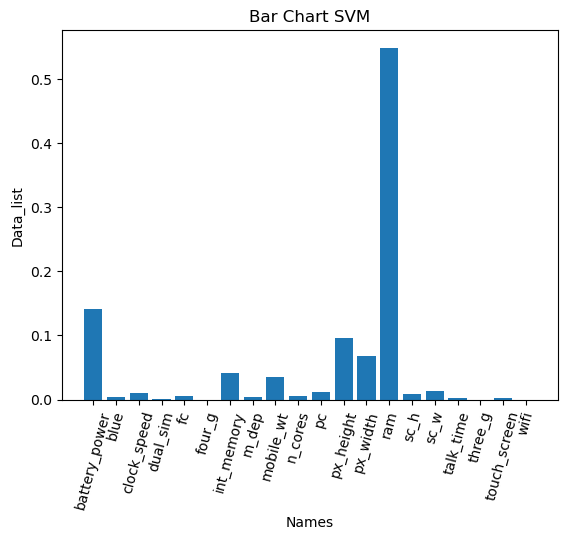

In [128]:
plt.bar(db['Names'], db['Data_list'])
plt.xlabel('Names')
plt.xticks(rotation=75)
plt.ylabel('Data_list')
plt.title('Bar Chart SVM')

As a bar graph is showing feature importance of each feature in our data, Let's select the specific important features from here to compare the result of all features and important features like 
( battery_power, px_height, px_width, ram) that contains more information as graph shows.

In [129]:
X=df[['battery_power','px_height','px_width','ram']]
X.shape

(2000, 4)

# **Test_train_Split using model_selection Sklearn**
Splitting Test and Train data, we split to train a model on one subset (training set) and then evaluate its performance on another subset (testing set) that the model has not seen during training. 

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(1600, 4)

**Training**

In [131]:
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

**Testing**

In [132]:
a=clf.predict(X_test)
a.shape

(400,)

**Storing Y_test in a list for making Classification report**

In [133]:
y_test = list(Y_test)
y_test[0]

0

# **Classification Report**
We already read above about Classification Report.
Here we can see that same trend is going on... There is same accuracy 80% like previous classification report... Class 0 and 3 model perform much precisely a little improved results in class 1 but not good at all in case of class 2. 

In [134]:
from sklearn.metrics import classification_report
print(classification_report(a, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       113
           1       0.74      0.77      0.75        87
           2       0.64      0.65      0.64        91
           3       0.82      0.84      0.83       109

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



# **Confusion Matrix**
We already read above about Confusion Matrix. 
Class 0 and 3 model perform much precisely a little improved results in class 1 but not good at all in case of class 2. 

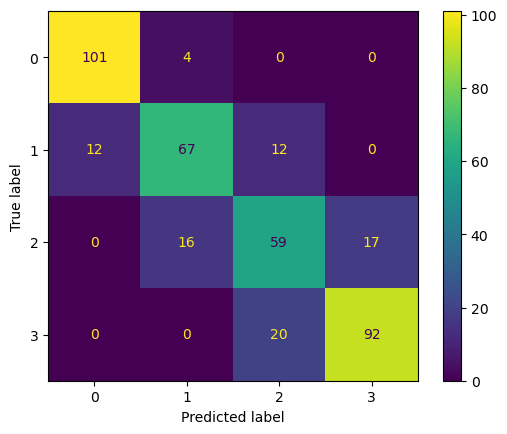

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, a, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

# **PCA**
Principal Component Analysis (PCA) is a dimensionality reduction technique. It transforms high-dimensional data into a lower-dimensional representation while preserving as much of the original variability as possible. PCA is particularly useful when working with datasets with many features. It helps to find the orthognal axis in the feature space that capture the most significant variability in the data .

In [136]:
from sklearn.decomposition import PCA

In [137]:
X = df.iloc[:, :-1]
my_list = []
for i in range(1,20):
    pca = PCA(n_components=i)
    pca.fit(X,Y)
    b=pca.explained_variance_ratio_
    my_list.append(b.sum())
print(my_list)    

[0.6704394117547604, 0.835618540247094, 0.9456801353132022, 0.9990250963312743, 0.9997393813720953, 0.999926455720313, 0.9999531326614046, 0.9999701755037417, 0.9999857453434353, 0.9999909614514634, 0.9999957980662151, 0.9999987635333206, 0.9999991436083867, 0.9999993380029093, 0.9999994849872335, 0.9999996291103156, 0.9999997713835749, 0.9999999038813654, 0.9999999530622048]


This line graph shows that there are 4 features that contains highest amount of information among all features and other contains information in lower amount. As there is small difference after 4th Feature.

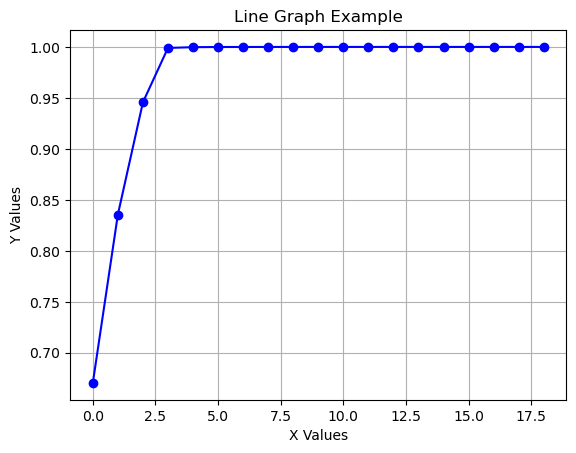

In [138]:
plt.plot(my_list, marker='o', linestyle='-', color='b')
plt.title('Line Graph Example')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)

plt.show()

Let's use that 4 features that contains highest amount of information among all and check that is there any differnece between previous reports or not.

In [139]:
pca = PCA(n_components=4)
pca.fit(X,Y)

PCA(n_components=4)

In [140]:
X_pca = pca.fit_transform(X)
X_pca.shape

(2000, 4)

**Test_train_Split using model_selection Sklearn**

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
X_train.shape

(1600, 4)

**Training**

In [142]:
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

**Testing**

In [143]:
a=clf.predict(X_test)
a.shape

(400,)

**Storing Y_test in a list for making Classification report**

In [144]:
y_test = list(Y_test)
y_test[0]

0

# **Classification Report**
We already read above about Classification Report.
Here we can see that same trend is going on... There is 81% accuracy ... Class 0 and 3 model perform much precisely a little improved results in class 1 but not good at all in case of class 2. 

In [145]:
from sklearn.metrics import classification_report
print(classification_report(a, y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       112
           1       0.75      0.77      0.76        88
           2       0.64      0.66      0.65        90
           3       0.83      0.85      0.84       110

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400



# **Confusion Matrix**
We already read above about Confusion Matrix. 
Class 0 and 3 model perform much precisely a little improved results in class 1 but not good at all in case of class 2. 

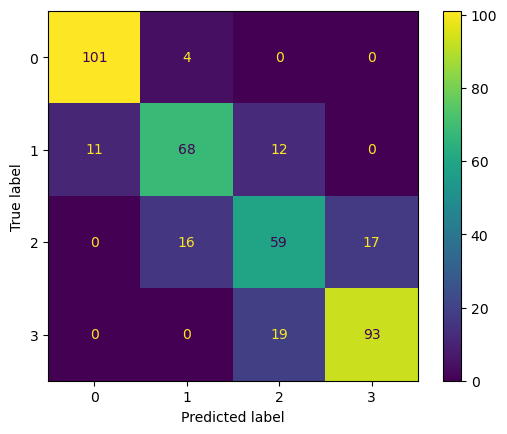

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, a, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()